In [501]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [502]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [503]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
142,143,5.8,2.7,5.1,1.9,Iris-virginica


In [504]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)


In [505]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [506]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)


In [507]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)


[[ 0.19928669  0.50188731 -1.6716688  -0.07053997 -1.1237329  -2.25997346
  -0.34985362  0.1010631   0.06194923 -0.92529923 -0.00444737  2.94516921
  -1.76025126 -0.82367028 -1.26503662 -1.18535535 -0.34133552  1.70385061
  -1.29640775 -1.78369681  1.07732109  1.00397776  1.01562939 -0.27767618
   2.89827658  1.2938168   1.39914747  1.24240153 -0.02485347 -0.90485316]
 [-0.47908059  0.16405949  0.33004047  0.41732132  1.06146832  0.65646645
   1.03401947  0.84632951  0.57360197  0.2199934  -0.18632177  0.93822485
  -0.33350754  0.01260624  0.73371593  0.38618236  0.3515217   1.69826364
   0.12397023 -0.14447233  0.77819096  1.48694358  0.41288409 -0.46918711
   2.00655607  0.95220032  1.36969761  1.19352019  1.03758256  0.46385613]
 [-0.995183   -0.16800935  0.27585581  0.77863235  1.08523401  0.83943946
   0.89650846  0.59751589  0.66257209  0.61304256 -0.89613118  1.32943921
  -0.93322504 -0.74594345  0.96377551  0.55540873  0.31620861  1.94101723
   0.0543584  -0.47775432  0.3658555

In [508]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.55239178 0.44942213 0.06488027 0.20134741 0.05263507 0.02400366
  0.11809171 0.21053137 0.22265269 0.11363349 0.44569816 0.75010637
  0.13419895 0.22786386 0.05659736 0.08683764 0.2028617  0.30655279
  0.11112264 0.10160186 0.44795098 0.22054255 0.5101096  0.45826728
  0.51796015 0.38966725 0.35759283 0.37196466 0.11743611 0.09683602]
 [0.28030835 0.32058094 0.48022406 0.32796049 0.46805404 0.44347707
  0.47122449 0.44359016 0.37139488 0.35719107 0.37158125 0.10081334
  0.55895395 0.52585465 0.41767968 0.41804033 0.40560577 0.30484486
  0.45990153 0.52336877 0.33213904 0.3574718  0.27918658 0.37839615
  0.21233767 0.27690561 0.34721533 0.35421976 0.33979092 0.38059217]
 [0.16729987 0.22999693 0.45489568 0.4706921  0.4793109  0.53251928
  0.4106838  0.34587847 0.40595243 0.52917544 0.18272059 0.14908029
  0.3068471  0.24628149 0.52572297 0.49512203 0.39153253 0.38860235
  0.42897583 0.37502937 0.21990998 0.42198565 0.21070382 0.16333658
  0.26970219 0.33342715 0.29519185 0.27381558 

In [509]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.2195564957998206

In [510]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[ 0.14197647, -0.06694153, -0.07503495],
        [ 0.11348441, -0.05326188, -0.06022253],
        [ 0.06460188,  0.04683796, -0.11143984],
        [-0.11824997, -0.03206977,  0.15031975]]),
 'gradBias': array([[-0.00262139, -0.02303651,  0.0256579 ]])}

In [511]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum, coeff_RMS):

    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))
    
    momentum_grad_weights = 0
    momentum_grad_bias = 0

    RMS_grad_weights = 0
    RMS_grad_bias = 0


    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * gradients["gradWeights"]
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * gradients["gradBias"]
        
        #Calculates Momentum using RMS prop algorithm
        RMS_grad_weights = coeff_RMS * RMS_grad_weights + (1-coeff_RMS) * np.square(gradients["gradWeights"])
        RMS_grad_bias = coeff_RMS * RMS_grad_bias + (1-coeff_RMS) * np.square(gradients["gradBias"])

        #Corrects RMS and Momentum values to update weights and biases
        momentum_grad_weights_corrected = (momentum_grad_weights / (1+pow(coeff_momentum,  i))).transpose()
        momentum_grad_bias_corrected = (momentum_grad_bias / (1+pow(coeff_momentum,  i))).transpose()

        RMS_grad_weights_corrected = (RMS_grad_weights / (1+pow(coeff_momentum,  i))).transpose()
        RMS_grad_bias_corrected = (RMS_grad_bias / (1+pow(coeff_momentum,  i))).transpose()



        # Compute gradient descent
        weights = weights - np.divide((learning_rate * momentum_grad_weights_corrected), (RMS_grad_weights_corrected ** 0.5))  
        bias = bias - np.divide((learning_rate * momentum_grad_bias_corrected), (RMS_grad_bias_corrected ** 0.5)) 

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [512]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.9, coeff_RMS=0.9)

#print(w)
#print(b)

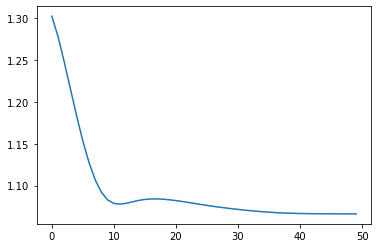

In [513]:
plt.plot(losses)

In [514]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [515]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)

[[5. 1. 2.]
 [7. 2. 3.]
 [5. 2. 3.]]
0.3333333333333333
